# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [8]:
# Your name: Eric Hunzeker
# Your github ID: erichunzeker
# Your pitt username: emh128

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

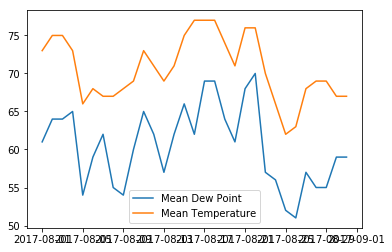

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [32]:
data = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2019-*.csv')], ignore_index = True)

# station id | date (individual day) | fromCNT | toCNT | rebalCNT 

def getDate(x):
    x = x.split()
    date = pd.Timestamp(x[0])
    return date.date()

def convert(x):
    date = pd.Timestamp(x)
    return date

def getMonth(x):
    return x.month

rebal = data[['Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal = rebal.fillna(0)
rebal['Starttime'] = rebal['Starttime'].apply(convert)
rebal = rebal.sort_values(by=['Bikeid', 'Starttime'])
rebal.head(20)

# data['From Date'] = data['Starttime'].apply(getDate)
# data['To Date'] = data['Stoptime'].apply(getDate)

# data_small = data[['From Date','From station id', 'Trip id', 'Bikeid', 'To station id', 'To Date']].copy()

# from_data = data_small[['From Date','From station id']].copy()
# from_data = from_data.copy()
# to_data = data_small[['To Date', 'To station id']].copy()
# to_data = to_data.copy()


# from_data['Direction'] = 'fromCNT'
# from_data.columns = ['Date','Station ID', 'Direction']

# to_data['Direction'] = 'toCNT'
# to_data.columns = ['Date','Station ID', 'Direction']


# seperated = from_data.append(to_data, ignore_index = True)

# seperated = seperated.sort_values('Station ID')

# cross = pd.crosstab(seperated["Date"], [seperated["Station ID"], seperated['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
# cross = cross.sort_values('Date')
# cross.head(20)


,Starttime,Bikeid,From station id,To station id
8353,2019-07-03 09:52:00,20135,90097.0,90097.0
8362,2019-07-03 10:16:00,20135,90097.0,90097.0
6601,2019-01-15 13:52:00,70000,1066.0,1028.0
1166,2019-02-18 11:08:00,70000,4929.0,1040.0
1756,2019-02-27 11:38:00,70000,1040.0,1040.0
2761,2019-03-12 10:35:00,70000,1040.0,1040.0
2901,2019-03-13 10:32:00,70000,1040.0,1093.0
3640,2019-03-17 20:08:00,70000,1093.0,1099.0
3900,2019-03-20 11:16:00,70000,49271.0,1029.0
3919,2019-03-20 13:44:00,70000,1029.0,1033.0


### Task 1.2

In [19]:
monthly = seperated.copy()
monthly['Date'] = monthly['Date'].apply(getMonth)
monthly = pd.crosstab(monthly["Date"], [monthly["Station ID"], monthly['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
monthly.head(20)

Station ID 666.0         1000.0        1001.0        1002.0        1003.0   \
Metric     fromCNT toCNT fromCNT toCNT fromCNT toCNT fromCNT toCNT fromCNT   
Date                                                                         
1                0     0      35    43      59    82      36    27      11   
2                0     0      51    58      61    80      51    49      24   
3                0     0     132   174     117   134      51    33      39   
4                0     0     392   426     276   330      89    81      88   
5                0     0     601   659     429   502     166   162     127   
6                0     0     666   722     498   522     110   109     132   
7                1     0     672   692     552   602     181   180     128   
8                2     0     586   640     470   539     188   165     146   
9                0     0     522   563     415   465     167   154     110   
10               0     0       0     2       0     0       0     0       0   

Station ID        ... 49801.0       49881.0       49921.0       49951.0        \
Metric     toCNT  ... fromCNT toCNT fromCNT toCNT fromCNT toCNT fromCNT toCNT   
Date              ...                                                           
1             12  ...       0     0       3     0       0     0       5     7   
2             22  ...       0     0       5     0       6     3       7     7   
3             26  ...       0     0      16    12      21    15      19    22   
4             81  ...       0     0      36    26      31    27      59    55   
5            127  ...       0     0      53    36      63    58      92    94   
6            134  ...       0     0      79    53      49    35      84    65   
7            126  ...       0     0      56    42     101   104      92   100   
8            155  ...      45    45      50    38     107    96     133   143   
9             95  ...     199   196      65    43     106   114     118   132   
10             0  ...       0     3       0     0       0     0       0     2   

Station ID 90097.0        
Metric     fromCNT toCNT  
Date                      
1                0     0  
2                0     0  
3                0     0  
4                0     0  
5                0     0  
6                0     0  
7                2     2  
8                0     0  
9                0     0  
10               0     0  

[10 rows x 238 columns]

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [7]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

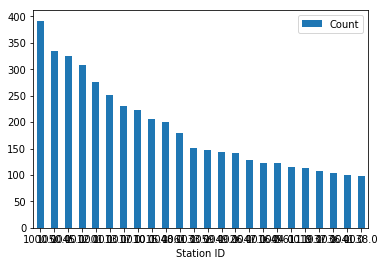

In [77]:
from_month = data_small[['From Date','From station id']].copy()
from_month = from_month.copy()


from_month.columns = ['Date','Station ID']
from_month = from_month.sort_values('Station ID')

from_month['Date'] = from_month['Date'].apply(getMonth)
# from_month = from_month.iloc[filter_month - 1: filter_month]
from_month = from_month.loc[from_month['Date'] == filter_month]
from_month = from_month['Station ID'].groupby([from_month['Station ID']]).count()
from_month = from_month.sort_values(ascending=False)
keys = from_month.keys()
counts = from_month.tolist()
# print(keys)
# print(counts)

df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ax = df.plot.bar(x='Station ID', y='Count', rot=0)


### Task 2.2

### Task 2.3

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

### Task 3.2

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

### Task 4.2

### Task 4.3